In [1]:
import numpy as np
# create dummy data for training
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [2]:
import torch
from torch.autograd import Variable
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [3]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 100

model = linearRegression(inputDim, outputDim)

In [14]:
a = np.array(([10]), dtype=np.float32)
model(Variable(torch.from_numpy(a)))

tensor([21.1697], grad_fn=<AddBackward0>)

In [4]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)


In [10]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(124.2347, grad_fn=<MseLossBackward0>)
epoch 0, loss 124.2347183227539
tensor(10.2519, grad_fn=<MseLossBackward0>)
epoch 1, loss 10.251912117004395
tensor(0.9534, grad_fn=<MseLossBackward0>)
epoch 2, loss 0.9533693194389343
tensor(0.1936, grad_fn=<MseLossBackward0>)
epoch 3, loss 0.1936085820198059
tensor(0.1303, grad_fn=<MseLossBackward0>)
epoch 4, loss 0.1303437203168869
tensor(0.1239, grad_fn=<MseLossBackward0>)
epoch 5, loss 0.1239042803645134
tensor(0.1221, grad_fn=<MseLossBackward0>)
epoch 6, loss 0.12211409211158752
tensor(0.1207, grad_fn=<MseLossBackward0>)
epoch 7, loss 0.12071719765663147
tensor(0.1194, grad_fn=<MseLossBackward0>)
epoch 8, loss 0.11936649680137634
tensor(0.1180, grad_fn=<MseLossBackward0>)
epoch 9, loss 0.11803328990936279
tensor(0.1167, grad_fn=<MseLossBackward0>)
epoch 10, loss 0.11671524494886398
tensor(0.1154, grad_fn=<MseLossBackward0>)
epoch 11, loss 0.11541184782981873
tensor(0.1141, grad_fn=<MseLossBackward0>)
epoch 12, loss 0.11412310600280762


[[ 0.6144341]
 [ 2.669959 ]
 [ 4.7254844]
 [ 6.7810097]
 [ 8.8365345]
 [10.892059 ]
 [12.947585 ]
 [15.00311  ]
 [17.058634 ]
 [19.114159 ]
 [21.169683 ]]


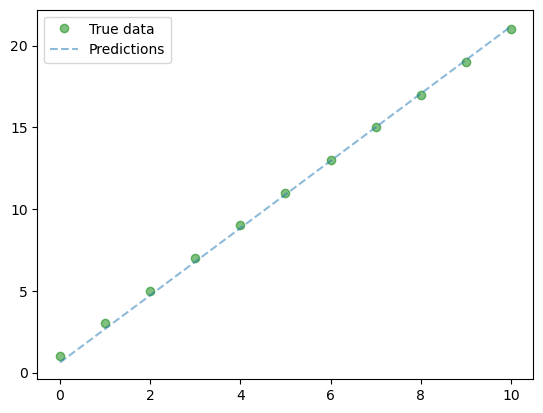

In [20]:
import matplotlib.pyplot as plt
with torch.no_grad(): # we don't need gradients in the testing phase
    
    predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()
